### Predicting Churn for Tours & Travels Company using various Machine Learning (ML) algorithms/models

| Submitted By: |  | Submitted To:
| :-: | :-: | :-: |
| Rishu Garg - 0768849 | | Prof. Manjari Maheshwari |

In [ ]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
CustomerTravel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customertravel.csv') #reading data

# Exploratory Data Analysis

In [ ]:
#Check the first 10 observations
CustomerTravel_df.head(10)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
5,27,Yes,High Income,1,No,Yes,1
6,34,No,Middle Income,4,Yes,Yes,0
7,34,No,Low Income,2,Yes,No,1
8,30,No,Low Income,3,No,Yes,0
9,36,Yes,High Income,1,No,No,1


In [ ]:
#Display number of observations and rows
CustomerTravel_df.shape                                       #our dataset has 954 values and 7 features

(954, 7)

In [ ]:
# Check for number of features, number of observations, non-null count, and datatype
CustomerTravel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [ ]:
CustomerTravel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Target,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Checking null values
CustomerTravel_df.isnull().sum()        #no null values found

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

# Identifying outliers and distribution of features

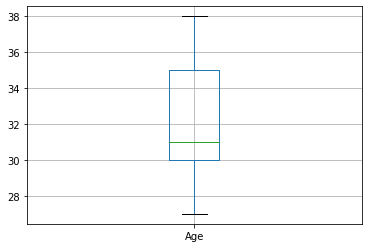

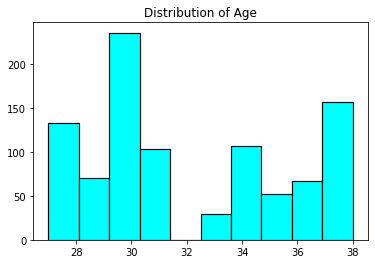

In [ ]:
# Age
CustomerTravel_df.boxplot(column = ['Age'])
CustomerTravel_df.hist(column = ['Age'],color = 'Cyan',edgecolor = 'black',linewidth = 1.2)
plt.title('Distribution of Age')
plt.grid(False)

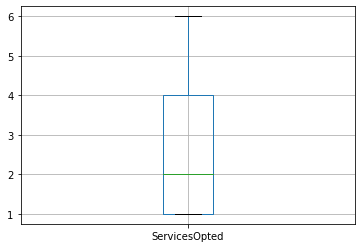

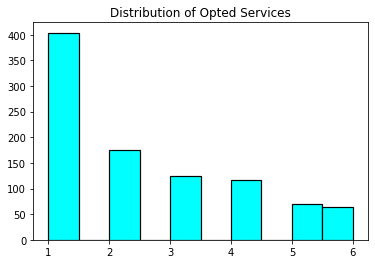

In [ ]:
#ServiceOpted
CustomerTravel_df.boxplot(column = ['ServicesOpted'])
CustomerTravel_df.hist(column = ['ServicesOpted'],color = 'Cyan',edgecolor = 'black',linewidth = 1.2)
plt.title('Distribution of Opted Services')
plt.grid(False)

Maximum number of customers opted only for 1 service. Company can focus on providing cheaper and better services.

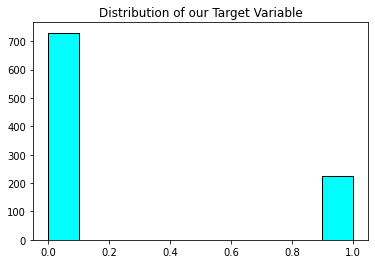

In [ ]:
# Target Variable
CustomerTravel_df.hist(column = ['Target'],color = 'Cyan',edgecolor = 'black')
plt.title('Distribution of our Target Variable')
plt.grid(False)

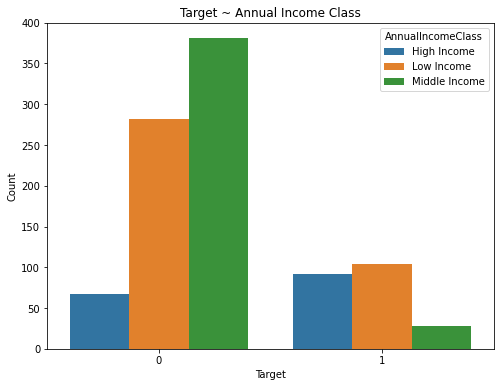

In [ ]:
income = CustomerTravel_df.groupby(['Target', 'AnnualIncomeClass']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'AnnualIncomeClass', data = income)
plt.title("Target ~ Annual Income Class")
plt.show()

The maximum number of customer who belonged to low income class group are the ones who churned so, company can focus on low income class customers and provide them with cheaper and reliable options.

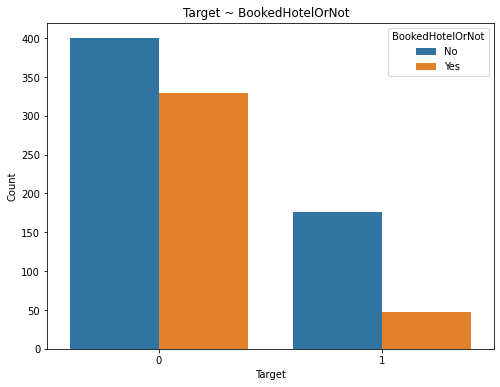

In [ ]:
hotel = CustomerTravel_df.groupby(['Target', 'BookedHotelOrNot']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'BookedHotelOrNot', data = hotel)
plt.title("Target ~ BookedHotelOrNot  ")
plt.show()

Customers who did not booked an hotel with the company are the one ones who churned most so, company can focus on providing better hotel options to their customers.

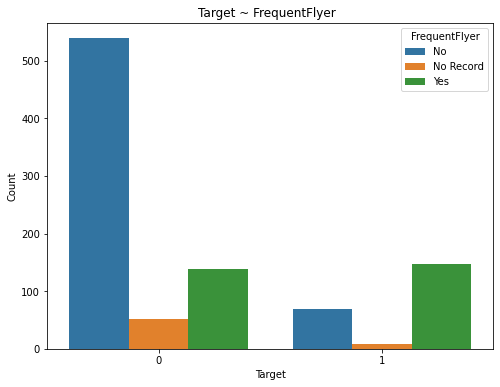

In [ ]:
flyer = CustomerTravel_df.groupby(['Target', 'FrequentFlyer']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'FrequentFlyer', data = flyer)
plt.title("Target ~ FrequentFlyer  ")
plt.show()

Maximum number of customers who are frequent flyers with the company are the one who churned most. so, it means they find the prices to be little expensive therefore, company can provide cheaper flight options to their customers and this can help them turn their customers from churning.

#Data Preprocessing

In [ ]:
#function to see the datatypes, null count, count of unique values and percentange of missing data of our dataset
def sniff_modified(df):
    data = pd.DataFrame()
    data['Data_Type'] = df.dtypes
    data['Percent_Missing'] = (df.isnull().sum()*100)/len(df)
    data['Unique_values'] = df.apply(lambda x: x.unique())
    data['Count_Unique_values'] = df.apply(lambda x: len(x.unique()))
    return data.sort_values('Data_Type')

In [ ]:
sniff_modified(CustomerTravel_df) #need to convert object datatypes into numeric in order to perform any ML algorithm

,Data_Type,Percent_Missing,Unique_values,Count_Unique_values
Age,int64,0.0,"[34, 37, 30, 27, 36, 28, 35, 31, 38, 33, 29]",11
ServicesOpted,int64,0.0,"[6, 5, 3, 2, 1, 4]",6
Target,int64,0.0,"[0, 1]",2
FrequentFlyer,object,0.0,"[No, Yes, No Record]",3
AnnualIncomeClass,object,0.0,"[Middle Income, Low Income, High Income]",3
AccountSyncedToSocialMedia,object,0.0,"[No, Yes]",2
BookedHotelOrNot,object,0.0,"[Yes, No]",2


In [ ]:
from pandas.api.types import is_categorical_dtype, is_string_dtype

def df_string_to_cat(df):
    for col in df.columns:                                                        #function to convert object datatype to categorical
        if is_string_dtype(df[col]):
            df[col] = df[col].astype('category').cat.as_ordered()

def df_cat_to_catcode(df):
    for col in df.columns:

        if is_categorical_dtype(df[col]):
            df[col] = df[col].cat.codes

In [ ]:
df_string_to_cat(CustomerTravel_df)
df_cat_to_catcode(CustomerTravel_df)

In [ ]:
sniff_modified(CustomerTravel_df)

,Data_Type,Percent_Missing,Unique_values,Count_Unique_values
FrequentFlyer,int8,0.0,"[0, 2, 1]",3
AnnualIncomeClass,int8,0.0,"[2, 1, 0]",3
AccountSyncedToSocialMedia,int8,0.0,"[0, 1]",2
BookedHotelOrNot,int8,0.0,"[1, 0]",2
Age,int64,0.0,"[34, 37, 30, 27, 36, 28, 35, 31, 38, 33, 29]",11
ServicesOpted,int64,0.0,"[6, 5, 3, 2, 1, 4]",6
Target,int64,0.0,"[0, 1]",2


In [ ]:
#Correlation
corr = CustomerTravel_df.corr()
corr


,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
Age,1.000000,0.034671,0.053149,-0.012422,-0.016367,0.024281,-0.131534
FrequentFlyer,0.034671,1.000000,-0.709380,-0.164981,-0.084590,-0.189947,0.418672
AnnualIncomeClass,0.053149,-0.709380,1.000000,0.236364,0.034744,0.250833,-0.418092
ServicesOpted,-0.012422,-0.164981,0.236364,1.000000,-0.148655,0.155886,0.038646
AccountSyncedToSocialMedia,-0.016367,-0.084590,0.034744,-0.148655,1.000000,-0.100104,0.073831
BookedHotelOrNot,0.024281,-0.189947,0.250833,0.155886,-0.100104,1.000000,-0.206055
Target,-0.131534,0.418672,-0.418092,0.038646,0.073831,-0.206055,1.000000


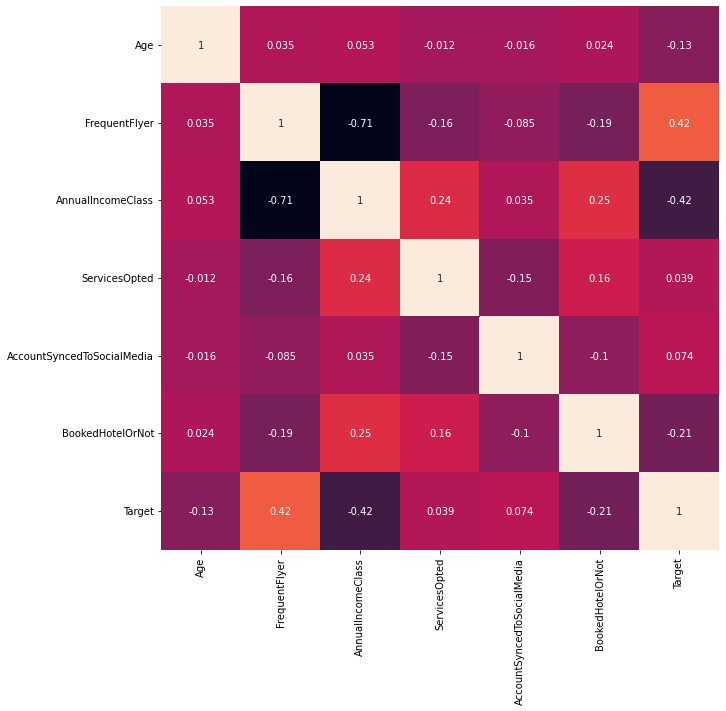

In [ ]:
#Heatmap
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, cbar=False)

FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia are the features that are positively correlated with our target variable. However, features such as Age, AnnualIncomeClass, and BookedHotelOrNot are negatively correlated

In [ ]:
#Baseline Model

#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
X = CustomerTravel_df.drop('Target',axis=1)
y = CustomerTravel_df['Target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=420) #splitting data into train and test

In [ ]:
rf = RandomForestClassifier(n_estimators=10,n_jobs=-1)
rf.fit(X_train,y_train)                                                #Fitting the model on test and train dataset
y_preds = rf.predict(X_test)
score = accuracy_score(y_test,y_preds)
print(f'Accuracy Score for Random Forest: {score*100:.2f}')

Accuracy Score for Random Forest: 87.43


Text(15.0, 0.5, 'Predicted label')

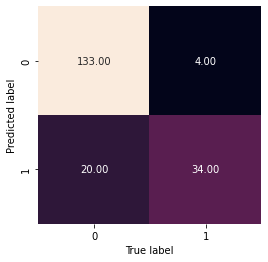

In [ ]:
conf_matrix = confusion_matrix(y_test,y_preds)
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(conf_matrix, fmt='.2f',annot=True,cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [ ]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10667 sha256=43bd1287528bafd3264328193649bdee7d1d7e1069dfcad272690d00e5e47415
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


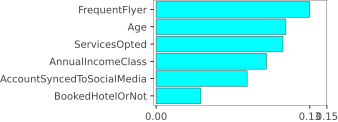

In [ ]:
#Plotting importances
from rfpimp import *
I = importances(rf,X_train,y_train)
plot_importances(I,color = 'Cyan',width=5,minheight=2,imp_range=(-0.002, 0.15))


In [ ]:
# Drop Un-important feature(s)

df = CustomerTravel_df.copy()
X = df.drop(['Target','BookedHotelOrNot'],axis = 1)
y = df['Target']

In [ ]:
# Run the random forest again and compare it with the baseline
rf = RandomForestClassifier(n_estimators=10,n_jobs=-1)
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)
score = accuracy_score(y_test,y_preds)
print(f'Accuracy Score for Random Forest: {score*100:.2f}')

Accuracy Score for Random Forest: 89.01


#Comparision

| Model |  | Test Accuracy
| :-: | :-: | :-: |
| Baseline Model | | 87.43 |
| |  | |
| Model After Feature Engineering |  | 89.01 |

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)

# Ridge Classifier
rc = RidgeClassifier()
rc.fit(X_train,y_train)

# Decison Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

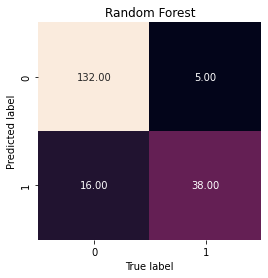

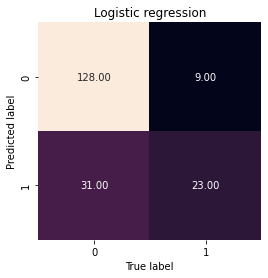

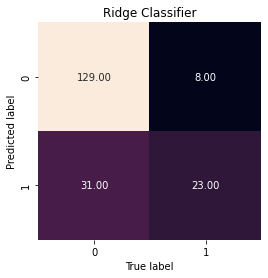

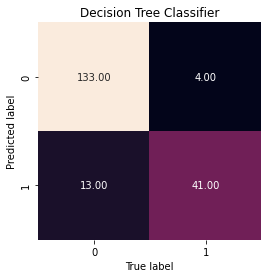

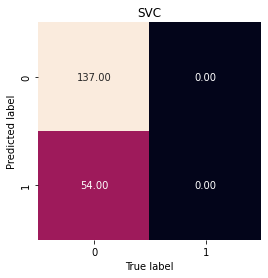

In [ ]:
#Confusion Matrix with total number of values for each classifier
def matrix(model, title):
    y_preds = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_preds)
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_matrix, fmt='.2f',annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title(title)

matrix(rf,'Random Forest')
matrix(lr, 'Logistic regression')
matrix(rc, "Ridge Classifier")
matrix(dt, "Decision Tree Classifier")
matrix(svc, "SVC")

In [ ]:
models1 = [rf,lr, rc, dt, svc]
models2 = ['Random Forest','Logistic Regression', 'Ridge Classifier', 'Decision Tree', 'svc']

for x, y, in zip(models1, models2):
  evaluate_model(x, y)

Random Forest Accuracy: 89.01


              precision    recall  f1-score   support

           0       0.89      0.96      0.93       137
           1       0.88      0.70      0.78        54

    accuracy                           0.89       191
   macro avg       0.89      0.83      0.85       191
weighted avg       0.89      0.89      0.89       191

Logistic Regression Accuracy: 79.06


              precision    recall  f1-score   support

           0       0.81      0.93      0.86       137
           1       0.72      0.43      0.53        54

    accuracy                           0.79       191
   macro avg       0.76      0.68      0.70       191
weighted avg       0.78      0.79      0.77       191

Ridge Classifier Accuracy: 79.58


              precision    recall  f1-score   support

           0       0.81      0.94      0.87       137
           1       0.74      0.43      0.54        54

    accuracy                           0.80       191
   macro avg       0.77

#Comparision

| Model |  | Test Accuracy
| :-: | :-: | :-: |
| Decison Tree Classifier | | 91.10 |
| Random Forest Classifier|  | 89.01|
| Ridge Classifier |  | 79.58 |
| Logistic Regression |  | 79.06 |
| SVC |  | 71.73 |

### Conlusion

Decision Tree Classifier performed the best among all other models with the accuracy of 91.10%, followed by Random Forest Classifer at 89.01%.